<p style="font-family: Arial; font-size:2.5em;color:purple; font-style:bold"><br>
Dimensionality Reduction with Keras Auto Encoder<br><br>Week 5 Summer 2020<br><br><br><br></p>



### Prepare Data
### Design Auto Encoder
### Train Auto Encoder
### Use Encoder level from Auto Encoder
### Use Encoder to obtain reduced dimensionality data for train and test sets

In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from numpy.random import seed
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model


Using TensorFlow backend.


In [2]:
print(os.listdir("./input"))

['test.csv', 'train.csv']


## Read train and test data

In [3]:
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')

## Dropping Target and ID's from train and test

In [4]:
target = train['target']
train_id = train['ID']
test_id = test['ID']

train.drop(['target'], axis=1, inplace=True)
train.drop(['ID'], axis=1, inplace=True)
test.drop(['ID'], axis=1, inplace=True)

In [5]:
print('Train data shape', train.shape)
print('Test data shape', test.shape)

Train data shape (4459, 4991)
Test data shape (49342, 4991)


### Scaling Train and Test data for Neural Net

In [6]:
# This estimator scales and translates each feature individually such that it is in the given range on the training set, 
# i.e. between zero and one.

train_scaled = minmax_scale(train, axis = 0)
test_scaled = minmax_scale(test, axis = 0)

c:\users\wzeng\appdata\local\continuum\anaconda3\envs\wz\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64.
  after removing the cwd from sys.path.



## Design Auto Encoder

Auto Encoders are is a type of artificial neural network used to learn efficient data patterns in an unsupervised manner. An Auto Encoder ideally consists of an encoder and decoder. 

The Neural Network is designed compress data using the Encoding level. The Decoder will try to uncompress the data to the original dimension.

To achieve this, the Neural net is trained using the Training data as the training features as well as target.

```
# Training a Typical Neural Net
model.fit(X_train, y_train)

# Training a Auto Encoder
model.fit(X_train, X_train)
```

These are typically used for dimensionality reduction use cases where there are more number of features.

![](https://upload.wikimedia.org/wikipedia/commons/2/28/Autoencoder_structure.png)

By Chervinskii [CC BY-SA 4.0 (https://creativecommons.org/licenses/by-sa/4.0)], from Wikimedia Commons

In [7]:
# define the number of features
ncol = train_scaled.shape[1]

### Split train data into train and validation 80:20 in ratio

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(train_scaled, target, train_size = 0.9, random_state = seed(2017))

c:\users\wzeng\appdata\local\continuum\anaconda3\envs\wz\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [9]:
### Define the encoder dimension
encoding_dim = 200

In [16]:
input_dim = Input(shape = (ncol, ))

# Encoder Layers
encoded1 = Dense(3000, activation = 'relu')(input_dim)
encoded2 = Dense(2750, activation = 'relu')(encoded1)
encoded3 = Dense(2500, activation = 'relu')(encoded2)
encoded4 = Dense(2250, activation = 'relu')(encoded3)
encoded5 = Dense(2000, activation = 'relu')(encoded4)
encoded6 = Dense(1750, activation = 'relu')(encoded5)
encoded7 = Dense(1500, activation = 'relu')(encoded6)
encoded8 = Dense(1250, activation = 'relu')(encoded7)
encoded9 = Dense(1000, activation = 'relu')(encoded8)
encoded10 = Dense(750, activation = 'relu')(encoded9)
encoded11 = Dense(500, activation = 'relu')(encoded10)
encoded12 = Dense(250, activation = 'relu')(encoded11)
encoded13 = Dense(encoding_dim, activation = 'relu')(encoded12)

# Decoder Layers
decoded1 = Dense(250, activation = 'relu')(encoded13)
decoded2 = Dense(500, activation = 'relu')(decoded1)
decoded3 = Dense(750, activation = 'relu')(decoded2)
decoded4 = Dense(1000, activation = 'relu')(decoded3)
decoded5 = Dense(1250, activation = 'relu')(decoded4)
decoded6 = Dense(1500, activation = 'relu')(decoded5)
decoded7 = Dense(1750, activation = 'relu')(decoded6)
decoded8 = Dense(2000, activation = 'relu')(decoded7)
decoded9 = Dense(2250, activation = 'relu')(decoded8)
decoded10 = Dense(2500, activation = 'relu')(decoded9)
decoded11 = Dense(2750, activation = 'relu')(decoded10)
decoded12 = Dense(3000, activation = 'relu')(decoded11)
decoded13 = Dense(ncol, activation = 'sigmoid')(decoded12)

# Combine Encoder and Deocder layers
autoencoder = Model(inputs = input_dim, outputs = decoded13)

# Compile the Model
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')

In [17]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 4991)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 3000)              14976000  
_________________________________________________________________
dense_28 (Dense)             (None, 2750)              8252750   
_________________________________________________________________
dense_29 (Dense)             (None, 2500)              6877500   
_________________________________________________________________
dense_30 (Dense)             (None, 2250)              5627250   
_________________________________________________________________
dense_31 (Dense)             (None, 2000)              4502000   
_________________________________________________________________
dense_32 (Dense)             (None, 1750)              3501750   
__________

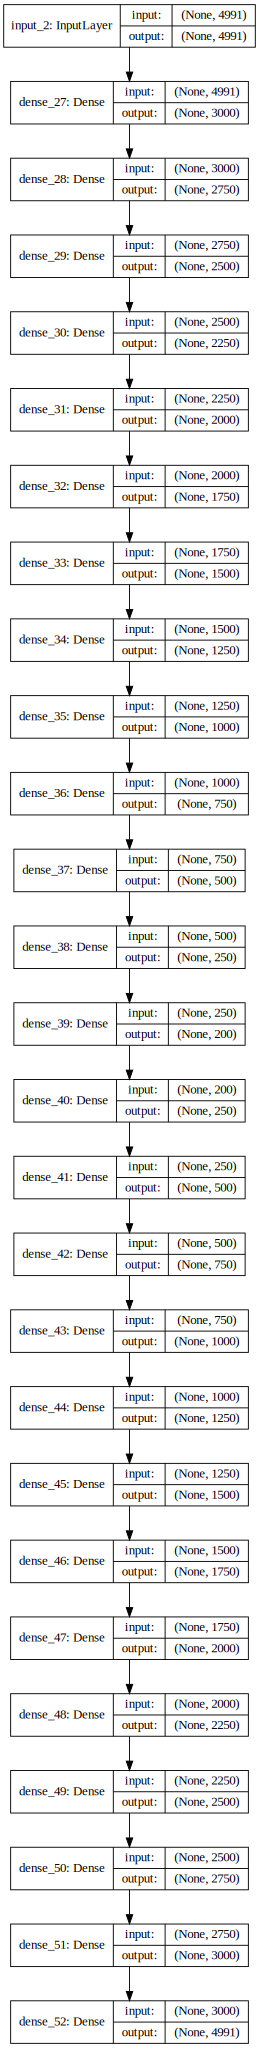

In [22]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(autoencoder, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

### Train Auto Encoder

In [23]:
history = autoencoder.fit(X_train, X_train, nb_epoch = 10, batch_size = 32, shuffle = False, validation_data = (X_test, X_test))

c:\users\wzeng\appdata\local\continuum\anaconda3\envs\wz\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 4013 samples, validate on 446 samples
Epoch 1/10
4013/4013 [==============================] - 25s 6ms/step - loss: 0.6857 - val_loss: 0.6630
Epoch 2/10
4013/4013 [==============================] - 16s 4ms/step - loss: 0.1021 - val_loss: 0.0160
Epoch 3/10
4013/4013 [==============================] - 16s 4ms/step - loss: 0.0150 - val_loss: 0.0150
Epoch 4/10
4013/4013 [==============================] - 16s 4ms/step - loss: 0.0140 - val_loss: 0.0141
Epoch 5/10
4013/4013 [==============================] - 16s 4ms/step - loss: 0.0136 - val_loss: 0.0140
Epoch 6/10
4013/4013 [==============================] - 16s 4ms/step - loss: 0.0135 - val_loss: 0.0139
Epoch 7/10
4013/4013 [==============================] - 16s 4ms/step - loss: 0.0135 - val_loss: 0.0139
Epoch 8/10
4013/4013 [==============================] - 16s 4ms/step - loss: 0.0135 - val_loss: 0.0139
Epoch 9/10
4013/4013 [==============================] - 16s 4ms/step - loss: 0.0135 - val_loss: 0.0139
Epoch 10/10
4013/4013 [===

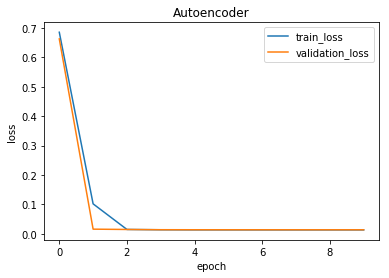

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.title("Autoencoder")
    plt.show()

show_history(history.history)

## Use Encoder level to reduce dimension of train and test data

In [13]:
encoder = Model(inputs = input_dim, outputs = encoded13)
encoded_input = Input(shape = (encoding_dim, ))

### Predict the new train and test data using Encoder

In [14]:
encoded_train = pd.DataFrame(encoder.predict(train_scaled))
encoded_train = encoded_train.add_prefix('feature_')

encoded_test = pd.DataFrame(encoder.predict(test_scaled))
encoded_test = encoded_test.add_prefix('feature_')

### Add target to train

In [15]:
encoded_train['target'] = target

In [16]:
print(encoded_train.shape)
encoded_train.head()

(4459, 201)


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_191,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199,target
0,0.0,0.0,0.039275,0.0,0.006697,0.060372,0.0,0.0,0.172999,0.0,...,0.173458,0.052922,0.0,0.0,0.0,0.021063,0.0,0.058586,0.0,38000000.0
1,0.0,0.0,0.038136,0.0,0.005196,0.059197,0.0,0.0,0.168416,0.0,...,0.166747,0.049357,0.0,0.0,0.0,0.020503,0.0,0.056835,0.0,600000.0
2,0.0,0.0,0.062532,0.0,0.015187,0.088619,0.0,0.0,0.237755,0.0,...,0.245494,0.079958,0.0,0.0,0.0,0.015799,0.0,0.072340,0.0,10000000.0
3,0.0,0.0,0.062374,0.0,0.015305,0.088368,0.0,0.0,0.237372,0.0,...,0.245672,0.079973,0.0,0.0,0.0,0.016077,0.0,0.072388,0.0,2000000.0
4,0.0,0.0,0.050853,0.0,0.010310,0.076291,0.0,0.0,0.206411,0.0,...,0.210992,0.066222,0.0,0.0,0.0,0.018264,0.0,0.065309,0.0,14400000.0


In [17]:
print(encoded_test.shape)
encoded_test.head()

(49342, 200)


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_190,feature_191,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199
0,0.0,0.0,0.032678,0.0,0.003642,0.049775,0.0,0.0,0.145821,0.0,...,0.0,0.144223,0.040262,0.0,0.0,0.0,0.023419,0.0,0.053123,0.0
1,0.0,0.0,0.064141,0.0,0.015848,0.090055,0.0,0.0,0.242665,0.0,...,0.0,0.251233,0.082011,0.0,0.0,0.0,0.015869,0.0,0.073383,0.0
2,0.0,0.0,0.057654,0.0,0.013332,0.083643,0.0,0.0,0.223973,0.0,...,0.0,0.230824,0.074323,0.0,0.0,0.0,0.017181,0.0,0.069951,0.0
3,0.0,0.0,0.045048,0.0,0.008033,0.068227,0.0,0.0,0.189433,0.0,...,0.0,0.191216,0.059451,0.0,0.0,0.0,0.020078,0.0,0.061798,0.0
4,0.0,0.0,0.046883,0.0,0.008901,0.071591,0.0,0.0,0.195135,0.0,...,0.0,0.198152,0.061637,0.0,0.0,0.0,0.019384,0.0,0.063366,0.0


In [18]:
encoded_train.to_csv('train_encoded.csv', index=False)
encoded_test.to_csv('test_encoded.csv', index=False)

## Conclusion